<a href="https://colab.research.google.com/github/Rimshay/DEEP-LEARNING/blob/main/Icovnet_6_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Listing 6.45 Preparing the IMDB data**

In [1]:
import tensorflow as tf
tf.test.is_built_with_cuda()
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
max_features = 10000
max_len = 500
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


**Listing 6.46 Training and evaluating a simple 1D convnet on the IMDB data**

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 3

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


157/157 [==============================] - 74s 462ms/step - loss: 0.8455 - acc: 0.5058 - val_loss: 0.6895 - val_acc: 0.5438
Epoch 2/10
157/157 [==============================] - 72s 460ms/step - loss: 0.6770 - acc: 0.6249 - val_loss: 0.6766 - val_acc: 0.6026
Epoch 3/10
157/157 [==============================] - 72s 457ms/step - loss: 0.6471 - acc: 0.7107 - val_loss: 0.6472 - val_acc: 0.6860
Epoch 4/10
157/157 [==============================] - 72s 460ms/step - loss: 0.5915 - acc: 0.7775 - val_loss: 0.5719 - val_acc: 0.7674
Epoch 5/10
157/157 [==============================] - 72s 459ms/step - loss: 0.4860 - acc: 0.8242 - val_loss: 0.4637 - val_acc: 0.8142
Epoch 6/10
157/157 [==============================] - 72s 458ms/step - loss: 0.3822 - acc: 0.8583 - val_loss: 0.4217 - val_acc: 0.8410
Epoch 7/10
157/157 [==============================] - 72s 459ms/step - loss: 0.3233 - acc: 0.8831 - val_loss: 0.4245 - val_acc: 0.8478
Epoch 8/10
157/157 [==============================] - 73s 463ms/st

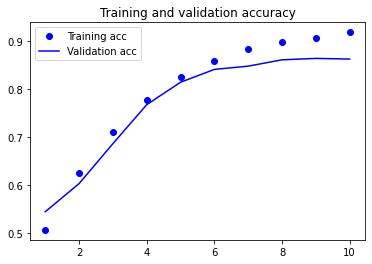

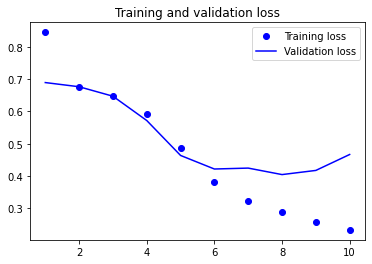

In [5]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**6.4.4 Combining CNNs and RNNs to process long sequences**
**Listing 6.47 Training and evaluating a simple 1D convnet on the Jena data **

In [6]:
!mkdir jena_climate
!cd jena_climate
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip 
!unzip jena_climate_2009_2016.csv.zip

--2022-03-06 22:14:35--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.206.240
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.206.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  36.1MB/s    in 0.4s    

2022-03-06 22:14:35 (36.1 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [ ]:
data_dir

NameError: ignored

In [7]:
import os
#data_dir = './jena_climate'
#fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')
f = open('jena_climate_2009_2016.csv')
data = f.read()
f.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [8]:
import numpy as np
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(',')[1:]]
  float_data[i, :] = values

In [9]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [10]:
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=6):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows),
                        lookback // step,
                        data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][1]
    yield samples, targets

In [11]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)
val_steps = (300000 - 200001 - lookback)
test_steps = (len(float_data) - 300001 - lookback)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen,
                              steps_per_epoch=500,
                              epochs=5, # 20
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/5
500/500 [==============================] - 1862s 4s/step - loss: 0.4186 - val_loss: 0.4413
Epoch 2/5
500/500 [==============================] - 1871s 4s/step - loss: 0.3572 - val_loss: 0.4446
Epoch 3/5
500/500 [==============================] - 1885s 4s/step - loss: 0.3355 - val_loss: 0.4478
Epoch 4/5
500/500 [==============================] - 1907s 4s/step - loss: 0.3200 - val_loss: 0.4696
Epoch 5/5
500/500 [==============================] - 1882s 4s/step - loss: 0.3088 - val_loss: 0.4425


In [13]:
list(history.history.keys())

['loss', 'val_loss']

In [14]:
len(val_loss)

10

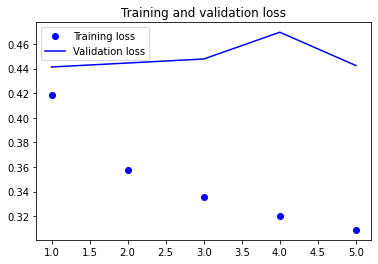

In [15]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']




plt.plot(range(1,len(loss)+1), loss, 'bo', label='Training loss')
plt.plot(range(1,len(val_loss)+1), val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Listing 6.48 Preparing higher-resolution data generators for the Jena dataset**

In [16]:
step = 3
lookback = 720
delay = 144

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step)
val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

**Listing 6.49 Model combining a 1D convolutional base and a GRU layer**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(), loss='mae')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, None, 32)          2272      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, None, 32)         0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, None, 32)          5152      
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,793
Trainable params: 13,793
Non-trainable params: 0
__________________________________________________

In [18]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=5, #20
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


500/500 [==============================] - 96s 184ms/step - loss: 0.3292 - val_loss: 0.2799
Epoch 2/5
500/500 [==============================] - 93s 186ms/step - loss: 0.2952 - val_loss: 0.2857
Epoch 3/5
500/500 [==============================] - 94s 188ms/step - loss: 0.2813 - val_loss: 0.2796
Epoch 4/5
500/500 [==============================] - 92s 185ms/step - loss: 0.2713 - val_loss: 0.2781
Epoch 5/5
500/500 [==============================] - 94s 188ms/step - loss: 0.2629 - val_loss: 0.2818


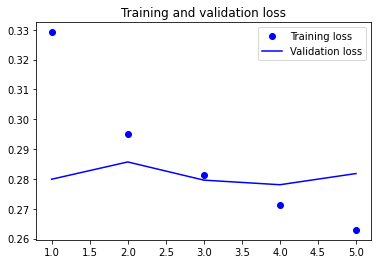

In [19]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']




plt.plot(range(1,len(loss)+1), loss, 'bo', label='Training loss')
plt.plot(range(1,len(val_loss)+1), val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()